In [1]:
import sys
import os

# Add the parent folder of 'src' to sys.path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(""), '..', 'src')))

In [2]:
import nltk
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger_eng")
nltk.download('universal_tagset')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset 

True

In [3]:
%pip install ir_datasets numpy matplotlib seaborn scikit-learn scipy wordcloud

import ir_datasets
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from clusters import clustering, interpret, evaluate, compute_global_centroid
from plots import plot_cluster_divergence, plot_top_divergent_terms, plot_cluster_kl_divergence, plot_tsne, plot_wordcloud

# Load dataset
dataset = ir_datasets.load("cord19/trec-covid/round1")

global_centroid, vectorizer = compute_global_centroid(dataset.docs_iter())

# Step 4: Run clustering using this vectorizer
clusters, vectorizer, X = clustering(ir_datasets.load("cord19/trec-covid/round1").docs_iter())

flat_cluster_dict = {doc_id: label for label, cluster in clusters for doc_id in cluster}
doc_ids = list(flat_cluster_dict.keys())
cluster_labels_numeric = list(flat_cluster_dict.values())

plot_tsne(X, cluster_labels_numeric)

# Storage for plotting
cluster_labels = []
kl_divergences = []
label_summaries = []

# Step 5: Interpret each cluster and collect info
for cluster in clusters:
    # Reuse dataset iterator
    dataset = ir_datasets.load("cord19/trec-covid/round1")

    # Interpret the cluster
    interpretation = interpret(
        cluster,
        dataset.docs_iter(),
        global_centroid=global_centroid,
        global_vectorizer=vectorizer
    )

    print(f"\nCluster {cluster[0]}:")
    print(f"  Medoid Doc ID: {interpretation['medoid']}")
    print(f"  Top Terms (TF-IDF): {', '.join(interpretation['top_terms'])}")
    print("  Divergent Terms (KL Contribution):")
    for term, score in zip(interpretation['divergent_terms'], interpretation['divergent_scores']):
        print(f"    - {term}: {score:.4e}")
    print(f"  Total KL Divergence: {interpretation['kl_divergence']:.4f}")

    # Show word cloud for this cluster
    # plot_wordcloud(interpretation['divergent_terms'], interpretation['divergent_scores'])

    # Collect info for cluster-level KL plot
    cluster_labels.append(f"Cluster {cluster[0]}")
    kl_divergences.append(interpretation['kl_divergence'])
    label_summaries.append(" / ".join(interpretation['divergent_terms'][:3]))



c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k = 10, silhouette score: 0.0099


MemoryError: Unable to allocate 8.87 GiB for an array with shape (42352, 28122) and data type float64

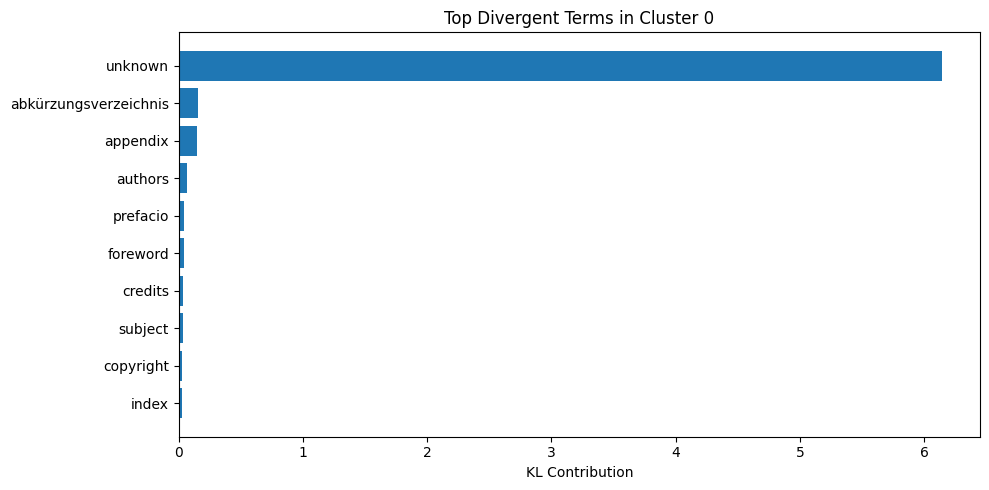

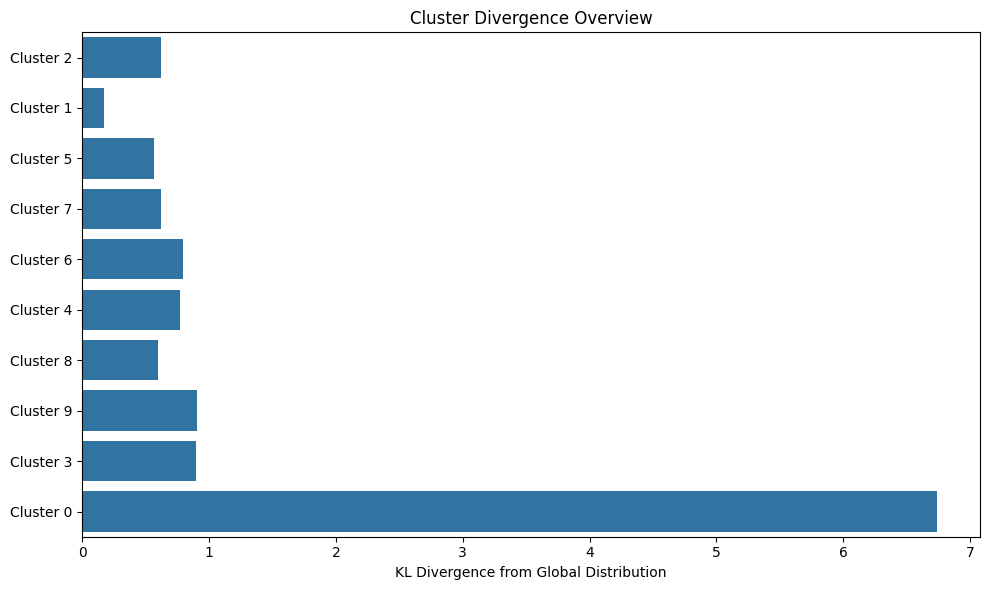

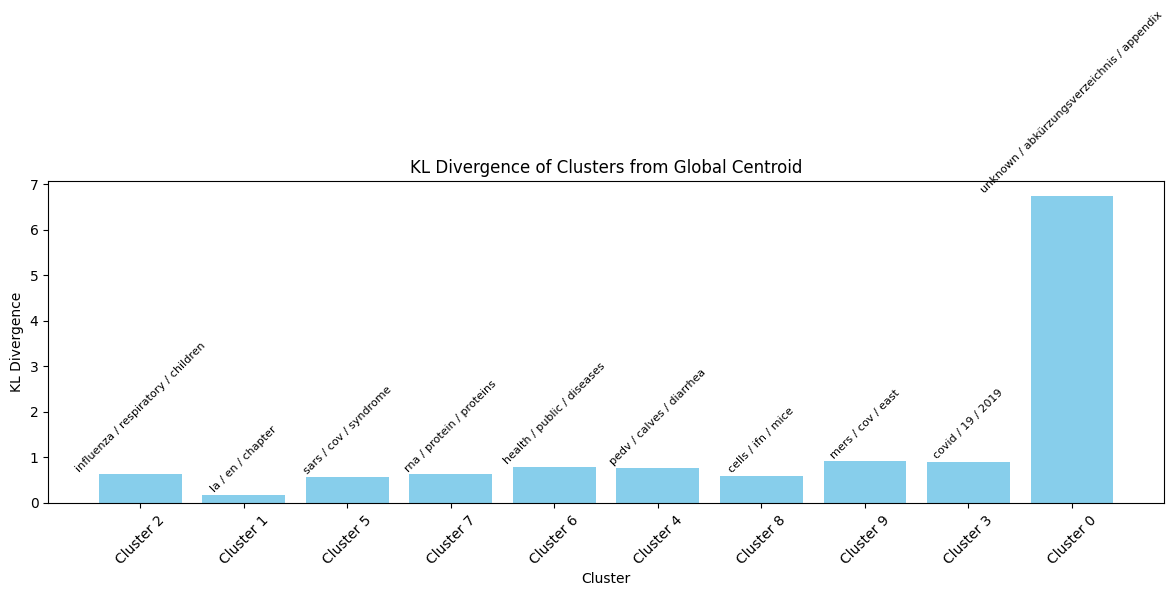

In [ ]:
# Plot after processing all clusters
plot_top_divergent_terms(cluster[0], interpretation['divergent_terms'], interpretation['divergent_scores'])
plot_cluster_kl_divergence(cluster_labels, kl_divergences)

plot_cluster_divergence(cluster_labels, kl_divergences, label_summaries)